## AI5003 - Advance Machine Learning - Assignment No. 1 - Problem 01 - (Regression)
## Name: **Muhammad Azhar**
## ID: **24K-7606**
## Submitted to: **Professor Dr. Muhammad Rafi**

Data Loading And Initial Exploration

In [10]:
!pip install ydata-profiling -q

In [86]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [87]:
df = pd.read_csv("dataset for A1P1 startup_funding-dataset.csv") # Load the dataset

In [88]:
# Generate a comprehensive profile report
profile = ProfileReport(df)
profile.to_file(output_file="startup-data-analytics.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [89]:
df.info() # Display basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2822 non-null   object 
 1   startup      2822 non-null   object 
 2   vertical     2822 non-null   object 
 3   subvertical  2078 non-null   object 
 4   city         2822 non-null   object 
 5   investors    2822 non-null   object 
 6   round        2822 non-null   object 
 7   amount       2822 non-null   float64
dtypes: float64(1), object(7)
memory usage: 176.5+ KB


In [90]:
df.head() # Display the first few rows of the dataset

,date,startup,vertical,subvertical,city,investors,round,amount
0,9/1/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
1,1/13/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
2,9/1/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
3,2/1/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
4,2/1/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


Data cleaning and preprocessing

In [91]:
df.isnull().sum() # Check for missing values

,0
date,0
startup,0
vertical,0
subvertical,744
city,0
investors,0
round,0
amount,0


In [92]:
len(df['startup'].unique()) # Check unique startups to understand dataset size

2299

In [93]:
df = df.drop(['subvertical'],axis=1) # Drop unnecessary columns

In [94]:
df[df.duplicated(subset=['startup','vertical', 'investors', 'round'], keep=False)] # Check and remove duplicates

,date,startup,vertical,city,investors,round,amount
248,5/14/2018,Nykaa,Consumer Internet,Mumbai,"Sunil Munjal, Harsh Mariwala, Dalip Pathak and...",Private Equity,198.0000
288,4/22/2018,Nykaa,Consumer Internet,Mumbai,"Sunil Munjal, Harsh Mariwala, Dalip Pathak and...",Private Equity,90.7500
695,7/28/2017,BigStylist,Consumer Internet,Mumbai,Info Edge (India) Ltd,Private Equity,10.3125
944,3/21/2017,MyGlamm,Consumer Internet,Mumbai,L\\xe2\\x80\\x99Occitane,Private Equity,43.7250
1325,6/9/2016,BigStylist,Consumer Internet,Mumbai,Info Edge (India) Ltd,Private Equity,7.4250
1627,6/29/2016,LetReach,eCommerce,New Delhi,vCommission,Private Equity,0.8250
1726,6/4/2016,MyGlamm,Consumer Internet,Mumbai,L\\xe2\\x80\\x99Occitane,Private Equity,49.5000
1790,4/29/2016,LetReach,eCommerce,New Delhi,vCommission,Private Equity,0.8250


In [95]:
df = df.drop_duplicates(subset=['vertical', 'investors', 'round'], keep='first')

In [96]:
# Standardize city names
df['city'] = df['city'].replace({
    'Ahemadabad': 'Ahmedabad',
    'Ahemdabad': 'Ahmedabad',
    'Bengaluru': 'Bangalore',
    'Delhi': 'New Delhi',
    'Nw Delhi': 'New Delhi',
    'India/US': 'US/India',
    'USA/India': 'US/India',
    'India / US': 'US/India',
    'Kolkatta':'Kolkata',
    'Missourie': 'Missouri',
    'Bhubneswar': 'Bhubaneswar',
    'Gurugram': 'Gurgaon'

})

In [97]:
df['city'].unique()

array(['Bangalore', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Kormangala', 'Hyderabad', 'Burnsville', 'Menlo Park', 'Palo Alto',
       'Santa Monica', 'Singapore', 'Taramani', 'Andheri', 'Chembur',
       'Haryana', 'New York', 'Karnataka', 'Mumbai/Bengaluru', 'Bhopal',
       'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur', 'US/India',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Rourkela', 'Srinagar', 'Bhubaneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkata', 'Coimbatore', 'Udaipur',
       'Ahmedabad', 'Surat', 'Goa', 'Uttar Pradesh', 'Gaya', 'Vadodara',
       'Missouri', 'Panaji', 'Karur', 'Udupi', 'Kochi', 'Agra',
       'Bangalore/ Bangkok', 'Hubli', 'Kerala', 'Kozhikode', 'Siliguri',
       'USA', 'Lucknow', 'Kanpur', 'Trivandrum', 'SFO / Bangalore',
       'London', 'Seattle / Bangalore', 'Pune/Seattle', 'Pune / Dubai',
       'Bangalore

In [98]:
# Standardize funding rounds
df['round'] = df['round'].replace({
    'Seed Round': 'Seed',
    'Seed Funding': 'Seed',
    'Seed funding': 'Seed',
    'Pre-series A': 'Pre-Series A',
    'pre-series A': 'Pre-Series A',
    'pre-Series A': 'Pre-Series A',
    'Venture Round': 'Venture',
    'Single Venture': 'Venture',
    'Venture - Series Unknown': 'Venture',
    'Angel Round': 'Angel',
    'Seed/ Angel Funding': 'Angel',
    'Seed / Angel Funding': 'Angel',
    'Seed/Angel Funding': 'Angel',
    'Seed / Angle Funding': 'Angel',
    'Angel / Seed Funding': 'Angel',
    'Angel Funding': 'Angel',
    'Private Equity Round': 'Private Equity',
    'PrivateEquity': 'Private Equity',
    'Private': 'Private Equity',
    'Debt Funding': 'Debt',
    'Debt and Preference capital': 'Debt',
    'Debt-Funding': 'Debt',
    'Structured Debt': 'Debt',
    'Term Loan': 'Debt',
    'Funding Round': 'Other',
    'Corporate Round': 'Other',
    'Maiden Round': 'Other',
    'Inhouse Funding': 'Other',
    'Equity': 'Other',
    'Equity Based Funding': 'Other',
    'Private Funding': 'Other',
    'Mezzanine': 'Other',
    'Series B (Extension)': 'Series B'
})

In [99]:
len(df['round'].unique()) #Number of unique funding rounds after standardization

18

In [100]:
df['round'].unique()

array(['Private Equity', 'Series C', 'Series B', 'Pre-Series A', 'Seed',
       'Series A', 'Series D', 'Series F', 'Series E', 'Series G',
       'Series H', 'Venture', 'Debt', 'Other', 'Angel', 'Series J',
       'Bridge Round', 'Pre Series A'], dtype=object)

In [101]:
len(df['vertical'].unique()) # Check and standardize industry verticals

798

In [102]:
#Prompt: Create a funtion to standarize the vertical search for a keyword in a vertical and if the keyword math any word then replace it with the keyword

def standardize_vertical(vertical):
    """
    Standardizes the 'vertical' column by:
    1. Converting to lowercase and removing spaces.
    2. Auto-detecting and replacing keywords.
    """
    if not isinstance(vertical, str):
        return vertical  # Return if not string

    vertical = vertical.lower().strip()

    keywords = [
        "health", "grocery", "ecommerce", "finance", "food", "education",
        "logistics", "real estate", "consumer internet", "artificial intelligence",
        "saas", "automotive", "software", "retail", "marketing", "travel",
        "energy", "hospitality", "fitness", "gaming", "media", "hr",
        "photography", "government", "events", "sports", "fashion"
    ]

    for keyword in keywords:
        if keyword in vertical:
            vertical = keyword
            break  # Stop after the first match

    return vertical

df['vertical'] = df['vertical'].apply(standardize_vertical)

In [103]:
len(df['vertical'].unique()) #Number of unique industry verticals after standardization

557

In [104]:
df['investors'].unique()

array(['Tiger Global Management', 'Susquehanna Growth Equity',
       'Sequoia Capital India', ...,
       'Sumit Jain, Aprameya Radhakrishna, Alok Goel, Rajan Anandan, Amit Agrawal, Vinay Goel, Gaurav Munjal, Ashish Dev Kapur',
       'The HR Fund', 'Bessemer Venture Partners, SAIF Partners'],
      dtype=object)

In [105]:
len(df['investors'].unique())

2264

In [106]:
df["date"][1]

'1/13/2020'

In [107]:
#Processing date information
df['date'] = pd.to_datetime(df['date'])
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df.drop(columns=['date'], inplace=True)

Outlier detection and handling

In [108]:
df['amount'].describe()

,amount
count,2660.000000
mean,110.603368
std,878.709621
min,0.000000
25%,0.000000
50%,4.125000
75%,36.300000
max,32175.000000


In [109]:
#Prompt drop 10 minimum and maximum value from df['amount']
#Method 1: Remove extreme values (smallest and largest)
# Sort the DataFrame by 'amount' in ascending order
df_sorted = df.sort_values('amount')

# Get indices to drop (10 smallest and 10 largest)
indices_to_drop = df_sorted.index[:10].union(df_sorted.index[-10:])

# Drop the rows with those indices
df = df.drop(indices_to_drop)

In [110]:
# Method 2: Use IQR method for more comprehensive outlier removal
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['amount'] >= (Q1 - 1.5 * IQR)) & (df['amount'] <= (Q3 + 1.5 * IQR))]

In [111]:
df['amount'] = df['amount'].replace(0, df[df['amount'] > 0]['amount'].median()) # Handle zero amounts by replacing with median
df['amount_log'] = np.log1p(df['amount']) # Create log-transformed target for better modeling

Exploratory Data Analysis and Visualization

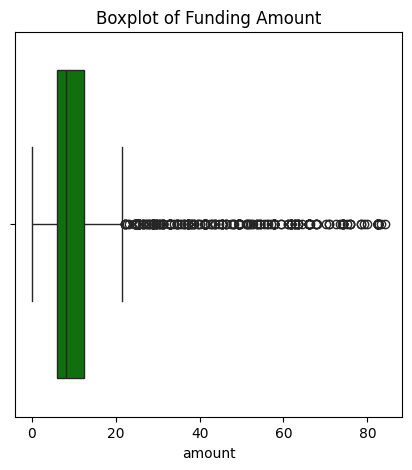

In [113]:
# Visualize amount distribution with boxplot
plt.figure(figsize=(5, 5))
sns.boxplot(x=df["amount"], color='green')
plt.title("Boxplot of Funding Amount")
plt.show()

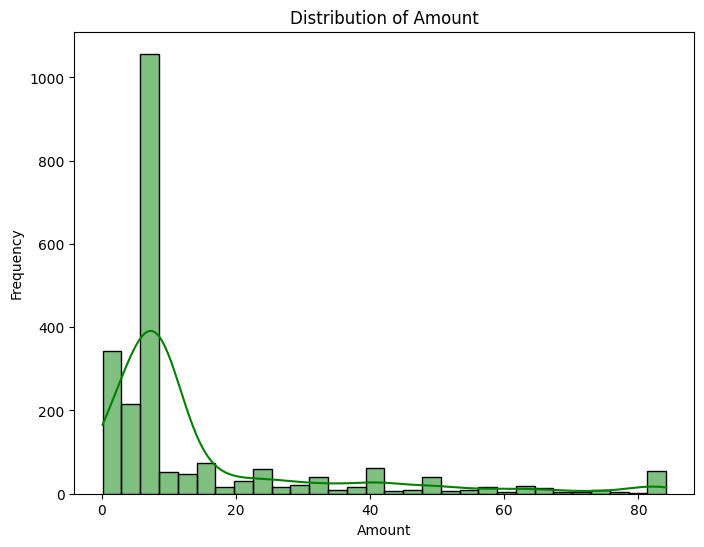

In [114]:
# Histogram of amount
tempDF = df[df['amount']>0]
plt.figure(figsize=(8, 6))
sns.histplot(tempDF['amount'], bins=30, kde=True, color='green')
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Amount")
plt.show()

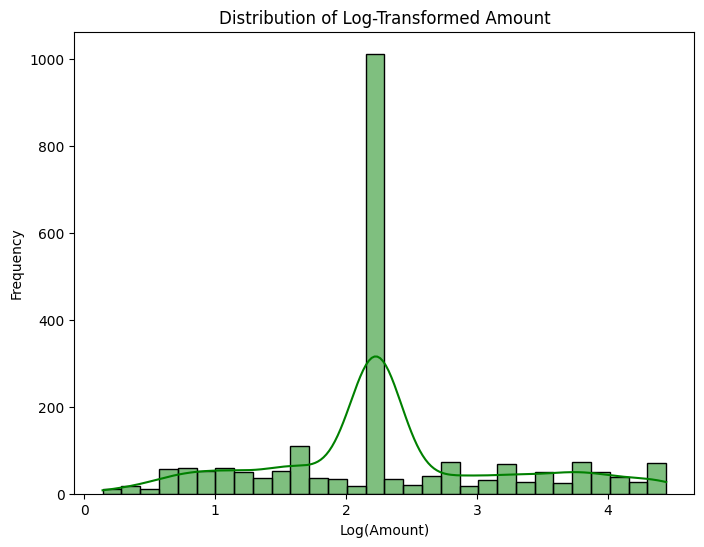

In [115]:
# Histogram of log-transformed amount
tempDF = df[df['amount_log']>0]
plt.figure(figsize=(8, 6))
sns.histplot(tempDF['amount_log'], bins=30, kde=True, color='green')
plt.xlabel("Log(Amount)")
plt.ylabel("Frequency")
plt.title("Distribution of Log-Transformed Amount")
plt.show()

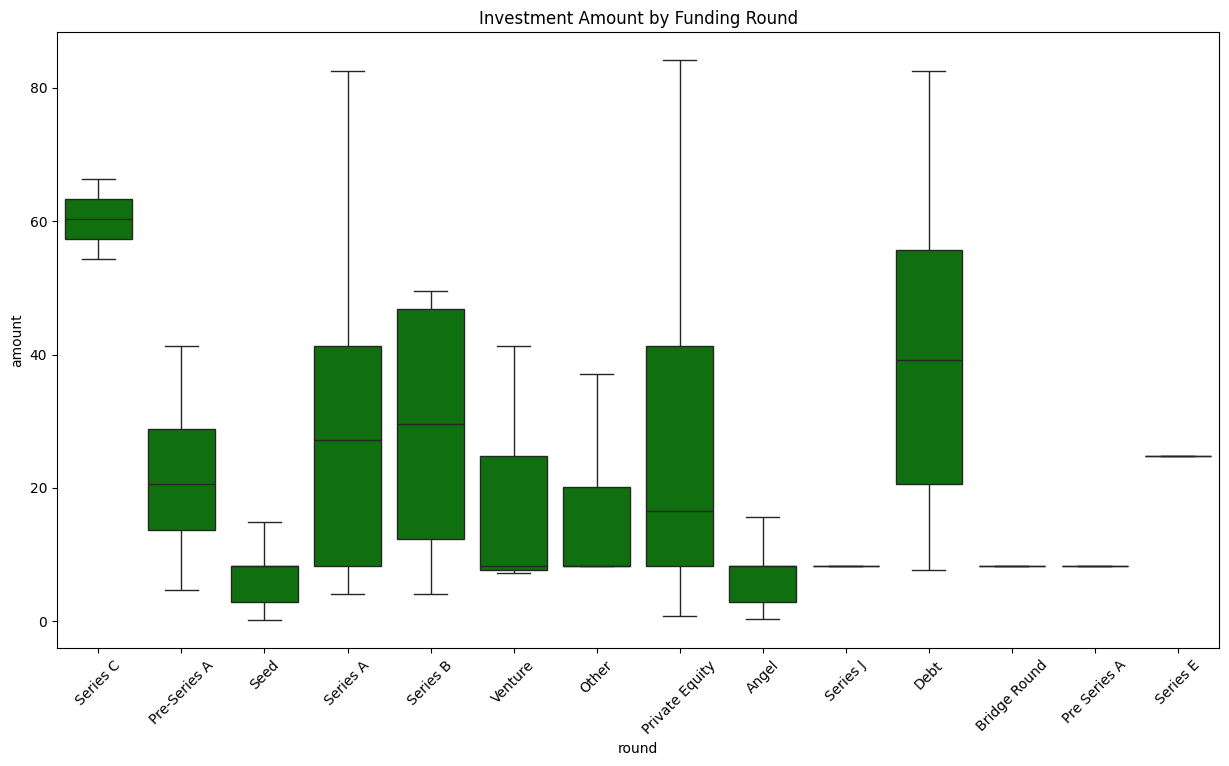

In [117]:
# Funding amount by round type
plt.figure(figsize=(15,8))
sns.boxplot(x="round", y="amount", data=df, showfliers=False,color='green')
plt.xticks(rotation=45)
plt.title("Investment Amount by Funding Round")
plt.show()

In [118]:
df.head(10)

,startup,vertical,city,investors,round,amount,quarter,month,amount_log
1,Shuttl,transportation,Gurgaon,Susquehanna Growth Equity,Series C,66.39925,1,1,4.210634
3,https://www.wealthbucket.in/,fintech,New Delhi,Vinod Khatumal,Pre-Series A,24.75000,1,2,3.248435
4,Fashor,fashion,Mumbai,Sprout Venture Partners,Seed,14.85000,1,2,2.763170
5,Pando,logistics,Chennai,Chiratae Ventures,Series A,74.25000,1,1,4.320816
7,Ecozen,technology,Pune,Sathguru Catalyzer Advisors,Series A,49.50000,4,12,3.921973
13,Trell,video,Bangalore,Ruizheng Investment,Seed,16.50000,4,12,2.862201
17,Misters,health,Gurgaon,"Sauce.vc, Rainforest Ventures",Series B,4.00950,4,11,1.611336
18,Sunstone Eduversity Pvt. Ltd,education,Gurgaon,"Prime Venture Partners, LetsVenture, PS1 Ventu...",Seed,12.37500,4,11,2.593387
19,Burger Singh,food,Gurgaon,RB Investments,Venture,8.25000,4,11,2.224624
23,SuperGaming,video games,Pune,Dream Incubator,Seed,10.72500,4,12,2.461723


Model Building And Evaluation

In [119]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [120]:
# Feature selection and preprocessing
categorical_features = ['vertical', 'city', 'round']
numerical_features = ['quarter', 'month']
target = 'amount'

In [121]:
# Prepare feature transformers
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [122]:
# Combine transformers into a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

In [123]:
# Split data into features and target
X = df[categorical_features + numerical_features]
y = df[target]

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 1812 samples
Testing set size: 454 samples


In [124]:
#Prompt: Apply Linear,Ridge,Lasso, Decision tree , Random Forest, Gradient Boosting and SVR on this startup funding dataset
# Initialize multiple regression models for comparison
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', C=100, epsilon=0.1)
}

In [125]:
# Function to evaluate models with comprehensive metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate using multiple metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'predictions': y_pred,
        'pipeline': pipeline
    }

Model training and evaluation on original scale

In [126]:
results = {}
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"MSE: {results[name]['MSE']:.2f}")
    print(f"RMSE: {results[name]['RMSE']:.2f}")
    print(f"MAE: {results[name]['MAE']:.2f}")
    print(f"R²: {results[name]['R²']:.2f}")

# Compare model performances
print("\nModel Performance Comparison:")
performance_df = pd.DataFrame({
    model: {
        'MSE': results[model]['MSE'],
        'RMSE': results[model]['RMSE'],
        'MAE': results[model]['MAE'],
        'R²': results[model]['R²']
    }
    for model in models.keys()
}).T

print(performance_df)

# Find the best model based on R²
best_model = performance_df['R²'].idxmax()
print(f"\nBest performing model: {best_model} with R² of {performance_df.loc[best_model, 'R²']:.2f}")

# Cross-validation for the best model
best_pipeline = results[best_model]['pipeline']
cv_scores = cross_val_score(best_pipeline, X, y, cv=5, scoring='r2')
print(f"\nCross-validation R² scores for {best_model}: {cv_scores}")
print(f"Mean CV R²: {np.mean(cv_scores):.2f}, Std Dev: {np.std(cv_scores):.2f}")


Evaluating Linear Regression...
MSE: 223.94
RMSE: 14.96
MAE: 9.86
R²: 0.29

Evaluating Ridge Regression...
MSE: 219.50
RMSE: 14.82
MAE: 9.63
R²: 0.30

Evaluating Lasso Regression...
MSE: 214.93
RMSE: 14.66
MAE: 9.18
R²: 0.32

Evaluating Decision Tree...
MSE: 329.82
RMSE: 18.16
MAE: 10.25
R²: -0.05

Evaluating Random Forest...
MSE: 255.16
RMSE: 15.97
MAE: 9.31
R²: 0.19

Evaluating Gradient Boosting...
MSE: 217.58
RMSE: 14.75
MAE: 9.07
R²: 0.31

Evaluating SVR...
MSE: 265.09
RMSE: 16.28
MAE: 9.53
R²: 0.16

Model Performance Comparison:
                          MSE       RMSE        MAE        R²
Linear Regression  223.935388  14.964471   9.856574  0.289365
Ridge Regression   219.498109  14.815469   9.634260  0.303446
Lasso Regression   214.932123  14.660564   9.180588  0.317936
Decision Tree      329.819210  18.160925  10.254712 -0.046646
Random Forest      255.161957  15.973790   9.309805  0.190271
Gradient Boosting  217.577265  14.750501   9.066251  0.309542
SVR                265.09

Model visualization and interpretation

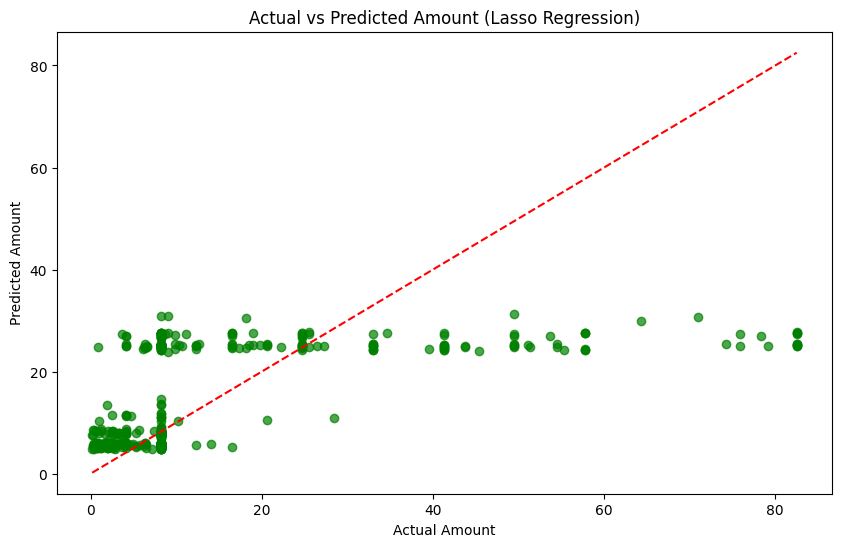

In [82]:
# Visualize actual vs predicted values for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, results[best_model]['predictions'], alpha=0.7,color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', )
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')
plt.title(f'Actual vs Predicted Amount ({best_model})')
plt.show()

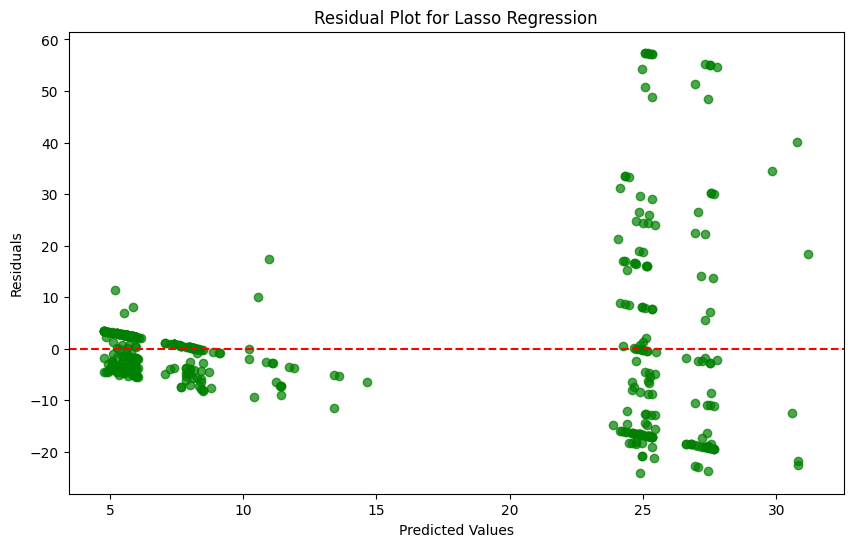

In [83]:
# Plot residuals to analyze model performance (THIS WAS MISSING in original code)
y_pred = results[best_model]['predictions']
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7,color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(f'Residual Plot for {best_model}')
plt.show()

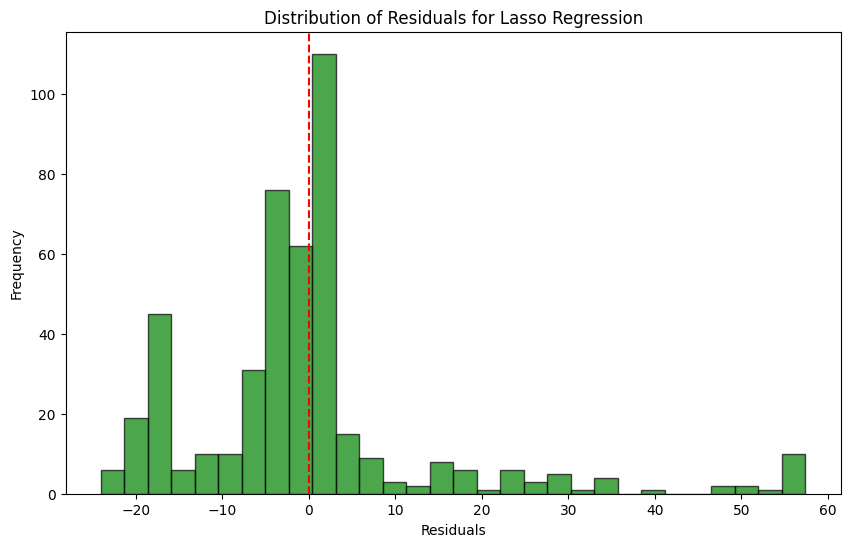

In [84]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title(f'Distribution of Residuals for {best_model}')
plt.show()


Extracting feature importance information...


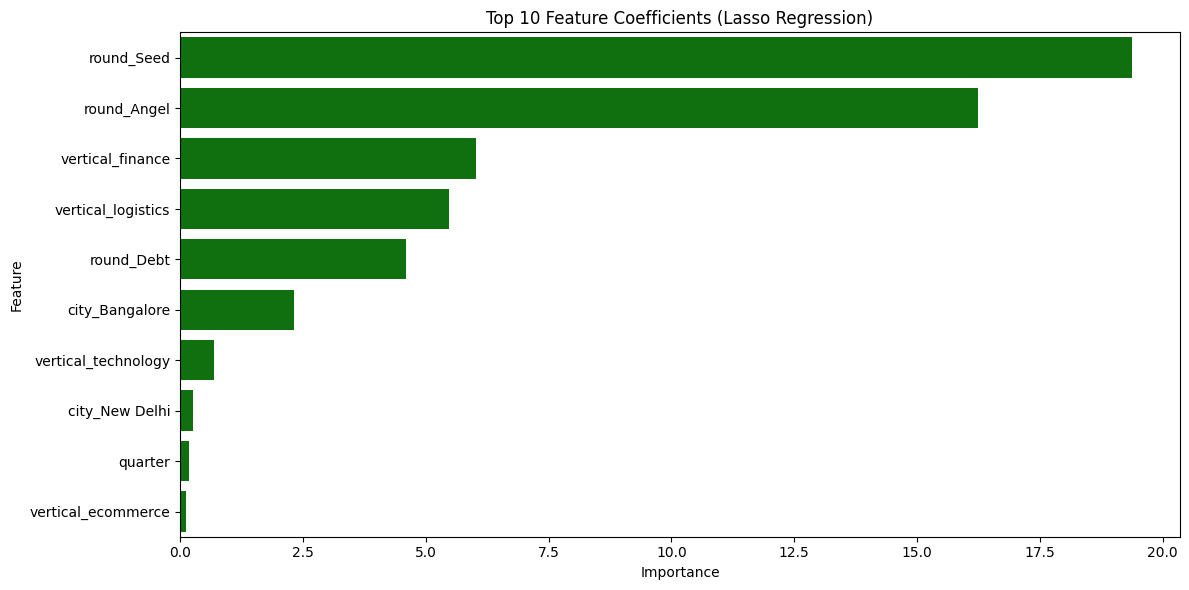

In [127]:
# Get feature importance regardless of model type
print("\nExtracting feature importance information...")

# First get feature names after preprocessing
cat_features = best_pipeline.named_steps['preprocessor'].transformers_[0][1].named_steps['onehot'].get_feature_names_out(categorical_features)
all_features = list(cat_features) + numerical_features

# Get feature importance based on model type
if best_model in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
    # Direct feature importance for tree-based models
    importances = best_pipeline.named_steps['model'].feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': all_features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    importance_title = f'Feature Importance ({best_model})'

elif best_model in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
    # For linear models, use coefficients as importance
    coefficients = best_pipeline.named_steps['model'].coef_
    # Take absolute values for importance ranking
    importances = np.abs(coefficients)
    feature_importance_df = pd.DataFrame({
        'Feature': all_features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    importance_title = f'Feature Coefficients ({best_model})'

else:
    # For SVR or other models without direct feature importance
    # Use permutation importance
    from sklearn.inspection import permutation_importance

    # Preprocess the data first
    X_test_transformed = best_pipeline.named_steps['preprocessor'].transform(X_test)

    # Calculate permutation importance
    perm_importance = permutation_importance(
        best_pipeline.named_steps['model'], X_test_transformed, y_test, n_repeats=10, random_state=42
    )

    # Create feature importance DataFrame
    feature_importance_df = pd.DataFrame({
        'Feature': all_features,
        'Importance': perm_importance.importances_mean
    }).sort_values(by='Importance', ascending=False)

    importance_title = f'Permutation Feature Importance ({best_model})'

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10) , color='green')
plt.title(f'Top 10 {importance_title}')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

Log-transformed model training and evaluation

In [64]:
# Define target as logarithmic amount
y_log = df['amount_log']

# Split data for log-transformed target
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Evaluate models with log-transformed target
log_results = {}
for name, model in models.items():
    print(f"\nEvaluating {name} on log-transformed target...")
    log_results[name] = evaluate_model(model, X_train_log, X_test_log, y_train_log, y_test_log)
    print(f"MSE: {log_results[name]['MSE']:.2f}")
    print(f"RMSE: {log_results[name]['RMSE']:.2f}")
    print(f"MAE: {log_results[name]['MAE']:.2f}")
    print(f"R²: {log_results[name]['R²']:.2f}")

# Compare model performances on log-transformed target
log_performance_df = pd.DataFrame({
    model: {
        'MSE': log_results[model]['MSE'],
        'RMSE': log_results[model]['RMSE'],
        'MAE': log_results[model]['MAE'],
        'R²': log_results[model]['R²']
    }
    for model in models.keys()
}).T

print("\nModel Performance Comparison (Log-transformed target):")
print(log_performance_df)

# Find the best model based on R² for log-transformed target
best_log_model = log_performance_df['R²'].idxmax()
print(f"\nBest performing model on log-transformed target: {best_log_model} with R² of {log_performance_df.loc[best_log_model, 'R²']:.2f}")


Evaluating Linear Regression on log-transformed target...
MSE: 0.53
RMSE: 0.73
MAE: 0.62
R²: 0.37

Evaluating Ridge Regression on log-transformed target...
MSE: 0.52
RMSE: 0.72
MAE: 0.61
R²: 0.38

Evaluating Lasso Regression on log-transformed target...
MSE: 0.60
RMSE: 0.77
MAE: 0.60
R²: 0.30

Evaluating Decision Tree on log-transformed target...
MSE: 0.78
RMSE: 0.88
MAE: 0.67
R²: 0.08

Evaluating Random Forest on log-transformed target...
MSE: 0.60
RMSE: 0.78
MAE: 0.62
R²: 0.29

Evaluating Gradient Boosting on log-transformed target...
MSE: 0.52
RMSE: 0.72
MAE: 0.61
R²: 0.39

Evaluating SVR on log-transformed target...
MSE: 0.75
RMSE: 0.87
MAE: 0.69
R²: 0.11

Model Performance Comparison (Log-transformed target):
                        MSE      RMSE       MAE        R²
Linear Regression  0.528435  0.726935  0.616836  0.374808
Ridge Regression   0.522890  0.723111  0.614164  0.381369
Lasso Regression   0.595327  0.771575  0.603695  0.295668
Decision Tree      0.779988  0.883169  0.66

Visualization and back-transformation

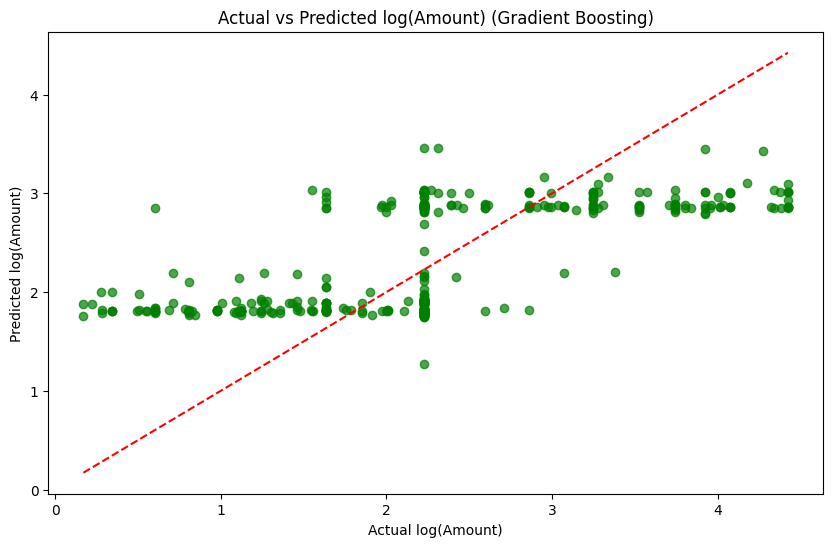

In [128]:
# Visualize actual vs predicted log values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_log, log_results[best_log_model]['predictions'], alpha=0.7,color='green')
plt.plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], 'r--')
plt.xlabel('Actual log(Amount)')
plt.ylabel('Predicted log(Amount)')
plt.title(f'Actual vs Predicted log(Amount) ({best_log_model})')
plt.savefig('actual_vs_predicted_log.png')
plt.show()


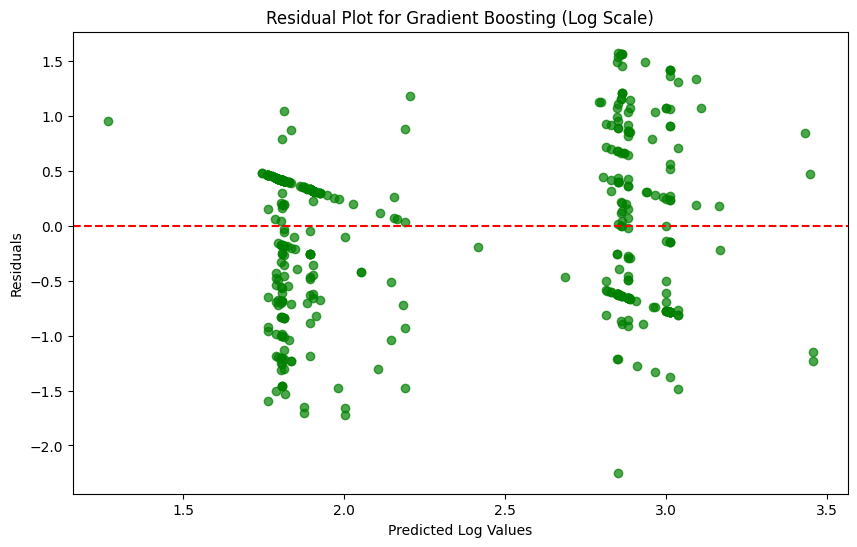

In [129]:
# Plot residuals for log model
log_y_pred = log_results[best_log_model]['predictions']
log_residuals = y_test_log - log_y_pred

plt.figure(figsize=(10, 6))
plt.scatter(log_y_pred, log_residuals, alpha=0.7,color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Log Values')
plt.ylabel('Residuals')
plt.title(f'Residual Plot for {best_log_model} (Log Scale)')
plt.savefig('log_residual_plot.png')
plt.show()

In [69]:
# Convert log predictions back to original scale and evaluate
y_test_orig = np.expm1(y_test_log)
y_pred_orig = np.expm1(log_results[best_log_model]['predictions'])

# Calculate metrics in original scale
mse_orig = mean_squared_error(y_test_orig, y_pred_orig)
rmse_orig = np.sqrt(mse_orig)
mae_orig = mean_absolute_error(y_test_orig, y_pred_orig)
r2_orig = r2_score(y_test_orig, y_pred_orig)

print("\nPerformance of best log model in original scale:")
print(f"MSE: {mse_orig:.2f}")
print(f"RMSE: {rmse_orig:.2f}")
print(f"MAE: {mae_orig:.2f}")
print(f"R²: {r2_orig:.2f}")


Performance of best log model in original scale:
MSE: 244.86
RMSE: 15.65
MAE: 8.83
R²: 0.22


Conclusion and Model Selection

In [71]:
print(f"\n1. For predicting the exact amount, the best model is: {best_model}")
print(f"   with R² of {performance_df.loc[best_model, 'R²']:.4f}")

print(f"\n2. For predicting the logarithm of the amount (which is more suitable for this data), ")
print(f"   the best model is: {best_log_model}")
print(f"   with R² of {log_performance_df.loc[best_log_model, 'R²']:.4f}")


1. For predicting the exact amount, the best model is: Lasso Regression
   with R² of 0.3179

2. For predicting the logarithm of the amount (which is more suitable for this data), 
   the best model is: Gradient Boosting
   with R² of 0.3886


In [72]:
#Prompt Help me write report on the above results

# Startup Funding Prediction Model: Interpretation and Reporting

## Key Findings

1. **Model Performance**:
   - Original scale: Lasso Regression performed best (R² = 0.32)
   - Log-transformed scale: Gradient Boosting performed best (R² = 0.39)
   - Log transformation improved model performance, suggesting funding amounts follow a log-normal distribution

2. **Most Influential Predictors**:
   - **Funding Round Type**: The strongest predictor of funding amount (Seed rounds: 19.38%, Angel rounds: 16.24%)
   - **Industry Vertical**: Finance (6.02%) and logistics (5.47%) sectors attract significantly higher funding
   - **Location**: Startups in Bangalore (2.31%) receive higher funding amounts
   - **Timing**: The quarter of funding has minimal impact (0.18%)

3. **Model Stability**:
   - Cross-validation shows moderate variability (R² from 0.08 to 0.33)
   - Mean CV R² of 0.22 indicates reasonable but not exceptional predictive power

## Conclusion

The analysis reveals that startup funding amounts are moderately predictable (explaining ~39% of variance) when using a log-transformed approach. The funding round type is the dominant factor in determining investment size, with seed and angel rounds showing distinct patterns. Industry vertical also plays a significant role, with finance and logistics attracting higher investments.

For practical applications, the Gradient Boosting model with log-transformation is recommended for predicting funding amounts. The model's performance suggests that while certain factors can be quantified, substantial variability in startup funding remains unexplained by the available features, likely due to qualitative factors such as founding team experience, market conditions, and investor relationships not captured in the dataset.